In [1]:
import numpy as np

### 3.3.1 Formulation of least squares problem

In [2]:
ages = np.array([35, 29, 34, 32, 28, 28, 24, 24, 28, 26, 26, 26])
weights = np.array([9.1, 8.9, 8.5, 7.4, 7.5, 7.3, 6.7, 6.5, 7.2, 6.5, 6.6, 7.1])
smoking = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Build A
ones = np.ones(ages.shape) # bias
A = np.column_stack((ones, ages, smoking))

# set y
y = weights
print('Matrix A:')
print(A)
print('Vector y')
print(y)

Matrix A:
[[ 1. 35.  0.]
 [ 1. 29.  0.]
 [ 1. 34.  0.]
 [ 1. 32.  0.]
 [ 1. 28.  0.]
 [ 1. 28.  0.]
 [ 1. 24.  1.]
 [ 1. 24.  1.]
 [ 1. 28.  1.]
 [ 1. 26.  1.]
 [ 1. 26.  1.]
 [ 1. 26.  1.]]
Vector y
[9.1 8.9 8.5 7.4 7.5 7.3 6.7 6.5 7.2 6.5 6.6 7.1]


### 3.3.2 QR Factorization to solve OLS

In [3]:
# QR factorization
Q, R = np.linalg.qr(A)

# Compute Q^T y
QTy = np.dot(Q.T, y)

# Solve Rx = Q^T y for x
x = np.linalg.solve(R[:3], QTy[:3])
print('Solution of Least Squares', x)

Solution of Least Squares [ 3.60599251  0.14550562 -0.57397004]


In [4]:
# Check results using SM OLS
import statsmodels.api as sm
model = sm.OLS(y, A)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     12.08
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00283
Time:                        20:43:10   Log-Likelihood:                -7.6287
No. Observations:                  12   AIC:                             21.26
Df Residuals:                       9   BIC:                             22.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6060      2.134      1.690      0.1

C:\Users\danie\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 3.3.3 Plot

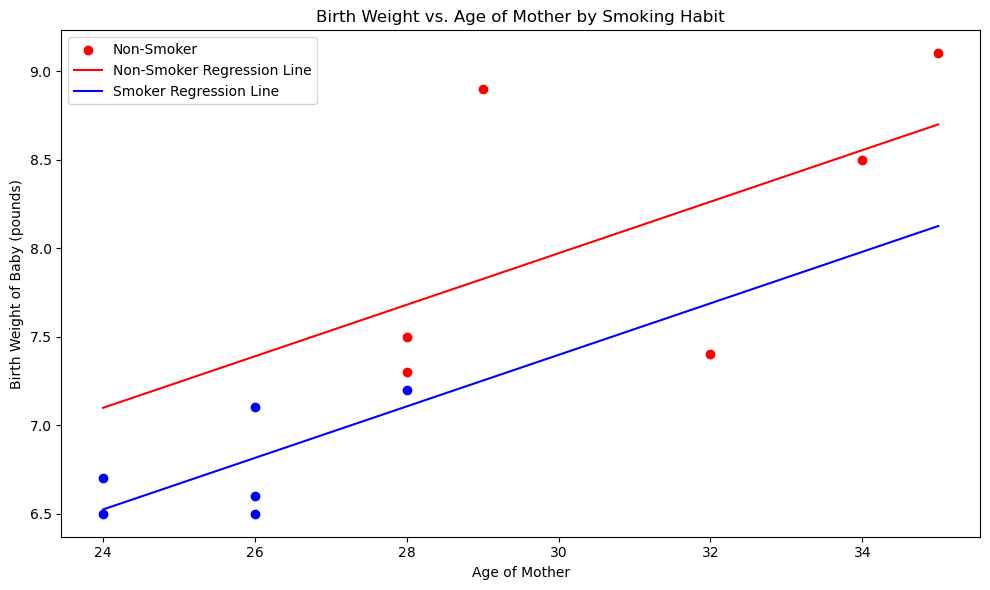

In [5]:
import matplotlib.pyplot as plt

# dynamic plot for smokers and no-smokers
plt.figure(figsize=(10, 6))
for i in range(len(ages)):
    if smoking[i] == 1:
        plt.scatter(ages[i], weights[i], color='blue', label='Smoker' if i == 0 else "")
    else:
        plt.scatter(ages[i], weights[i], color='red', label='Non-Smoker' if i == 0 else "")

# regression lines
ages_line = np.linspace(min(ages), max(ages), 100)
weights_non_smokers = x[0] + x[1] * ages_line
weights_smokers = x[0] + x[1] * ages_line + x[2]
plt.plot(ages_line, weights_non_smokers, color='red', label='Non-Smoker Regression Line')
plt.plot(ages_line, weights_smokers, color='blue', label='Smoker Regression Line')

plt.xlabel('Age of Mother')
plt.ylabel('Birth Weight of Baby (pounds)')
plt.title('Birth Weight vs. Age of Mother by Smoking Habit')
plt.legend()
plt.tight_layout()
plt.show()